In [2]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Wall time: 3.03 s


In [3]:
jpm = pd.read_csv('C:/Users/Heidi/Desktop/MMAI Course/894 Deep Learning/Project/0.0-sh-data-JPM.csv')

In [4]:
jpm.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2008-12-09,35.67,35.70,33.66,33.96,65827700.0,0.0,1.0,28.447812,28.471738,26.844782,27.084040,65827700.0
1,2008-12-10,34.40,34.96,33.08,33.52,47919600.0,0.0,1.0,27.434952,27.881568,26.382216,26.733128,47919600.0
2,2008-12-11,32.60,32.76,29.74,29.94,70746400.0,0.0,1.0,25.999402,26.127007,23.718473,23.877979,70746400.0
3,2008-12-12,28.44,31.22,28.01,30.94,59939000.0,0.0,1.0,22.681687,24.898814,22.338750,24.675506,59939000.0
4,2008-12-15,29.34,29.78,28.17,28.63,51629100.0,0.0,1.0,23.399462,23.750374,22.466355,22.833217,51629100.0


In [5]:
jpm.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2517.000000,2517.0,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,59.237773,59.808096,58.648683,59.237920,2.767582e+07,0.005419,1.0,53.948517,54.458614,53.421919,53.948322,2.767582e+07
std,24.055102,24.140346,23.963633,24.040061,2.225182e+07,0.048294,0.0,25.817522,25.940125,25.686992,25.802015,2.225182e+07
min,15.350000,17.290000,14.960000,15.900000,3.680043e+06,0.000000,1.0,12.390438,13.956396,12.075632,12.834395,3.680043e+06
25%,40.980000,41.400000,40.550000,40.920000,1.380260e+07,0.000000,1.0,33.696535,34.132818,33.338326,33.745183,1.380260e+07
50%,55.260000,55.830000,54.680000,55.260000,2.018895e+07,0.000000,1.0,49.057108,49.432763,48.613954,49.064743,2.018895e+07
75%,66.830000,67.189900,66.270000,66.710000,3.370562e+07,0.000000,1.0,62.394605,62.785187,61.942525,62.440888,3.370562e+07
max,119.130000,119.330000,118.080000,118.770000,2.172942e+08,0.800000,1.0,118.308909,118.418151,117.266146,117.812355,2.172942e+08


In [6]:
jpm['lag_t-1']=jpm['Adj_Open'].shift(1)
jpm['lag_t-2']=jpm['Adj_Open'].shift(2)
jpm['lag_t-3']=jpm['Adj_Open'].shift(3)
jpm['target']=jpm['Adj_Open'].shift(-1)
jpm['SMA'] = jpm['Adj_Open'].rolling(10).mean() #simple Moving Average
jpm['EMA'] = jpm['Adj_Open'].ewm(span = 12, min_periods = 12).mean() #Exponential Moving Average
jpm['return']=jpm['Adj_Open'].diff(1)/jpm['Adj_Close'].shift(1)
jpm['cumsum']=jpm['return'].cumsum()
jpm.head(5)

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,...,Adj_Close,Adj_Volume,lag_t-1,lag_t-2,lag_t-3,target,SMA,EMA,return,cumsum
0,2008-12-09,35.67,35.70,33.66,33.96,65827700.0,0.0,1.0,28.447812,28.471738,...,27.084040,65827700.0,NaN,NaN,NaN,27.434952,NaN,NaN,NaN,NaN
1,2008-12-10,34.40,34.96,33.08,33.52,47919600.0,0.0,1.0,27.434952,27.881568,...,26.733128,47919600.0,28.447812,NaN,NaN,25.999402,NaN,NaN,-0.037397,-0.037397
2,2008-12-11,32.60,32.76,29.74,29.94,70746400.0,0.0,1.0,25.999402,26.127007,...,23.877979,70746400.0,27.434952,28.447812,NaN,22.681687,NaN,NaN,-0.053699,-0.091096
3,2008-12-12,28.44,31.22,28.01,30.94,59939000.0,0.0,1.0,22.681687,24.898814,...,24.675506,59939000.0,25.999402,27.434952,28.447812,23.399462,NaN,NaN,-0.138945,-0.230041
4,2008-12-15,29.34,29.78,28.17,28.63,51629100.0,0.0,1.0,23.399462,23.750374,...,22.833217,51629100.0,22.681687,25.999402,27.434952,23.136278,NaN,NaN,0.029089,-0.200952


In [7]:
table = np.array(jpm.iloc[20:-1,1:-2])
table.shape

(2496, 18)

In [8]:
target=jpm['target'].iloc[20:-1].values.reshape(-1,1)
target.shape

(2496, 1)

In [10]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#print(scaler.fit(x_array))
MinMaxScaler(copy=True, feature_range=(0, 1))
df=scaler.fit_transform(table)

df=scaler.fit_transform(target)

In [19]:
X_train=table[:1800,:]
y_train=target[:1800,:]
X_test=table[1801:,:]
y_test=target[1801:,:]

In [49]:
len(X_train)

1800

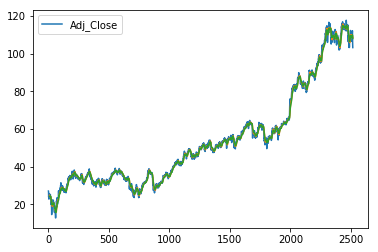

In [24]:
jpm[['Adj_Close']].plot()
jpm['SMA'].plot()
jpm['EMA'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F6858F7160>]],
      dtype=object)

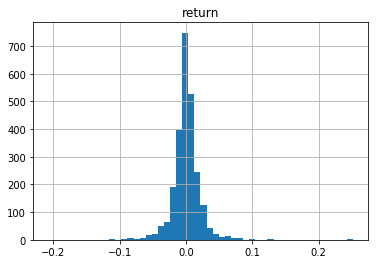

In [25]:
jpm[['return']].hist(bins=50)

## Autocorrelation

### **Serial Correlation (Autocorrelation)**
Essentially when we model a time series we decompose the series into three components: trend, seasonal/cyclical, and random. The random component is called the residual or error. It is simply the difference between our predicted value(s) and the observed value(s). Serial correlation is when the residuals (errors) of our TS models are correlated with each other. 

### **Why Do We Care about Serial Correlation?**
We care about serial correlation because it is critical for the validity of our model predictions, and is intrinsically related to stationarity. Recall that the residuals (errors) of a stationary TS are serially uncorrelated by definition! If we fail to account for this in our models the standard errors of our coefficients are underestimated, inflating the size of our T-statistics. The result is too many Type-1 errors, where we reject our null hypothesis even when it is True! In layman's terms, ignoring autocorrelation means our model predictions will be bunk, and we're likely to draw incorrect conclusions about the impact of the independent variables in our model. 

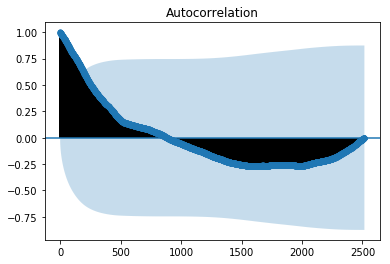

In [62]:
# check correlations of squared observations
from random import gauss
from random import seed
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
# seed pseudorandom number generator
seed(1)
# square the dataset
squared_data = np.power(jpm['Adj_Close'],2)
plot_acf(squared_data)
pyplot.show()

### Scatter Matrix

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


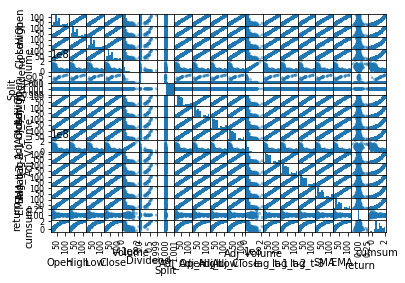

In [11]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(jpm)
plt.show()

In [39]:
x_array = np.array(jpm.iloc[20:,1:-1])
x_array.shape

(2497, 18)

In [40]:
from sklearn import preprocessing
scaler = MinMaxScaler()
#print(scaler.fit(x_array))
MinMaxScaler(copy=True, feature_range=(0, 1))
df=scaler.fit_transform(x_array)
#normalized_jpm = preprocessing.normalize([x_array])

### Correlation Matrix of Normalized Features

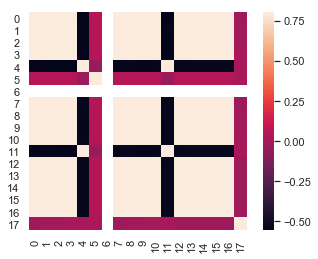

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
dfd=pd.DataFrame(df)
dfcor=dfd.corr()
sns.heatmap(dfcor, vmax=.8, square=True)
#sns.heatmap(df)

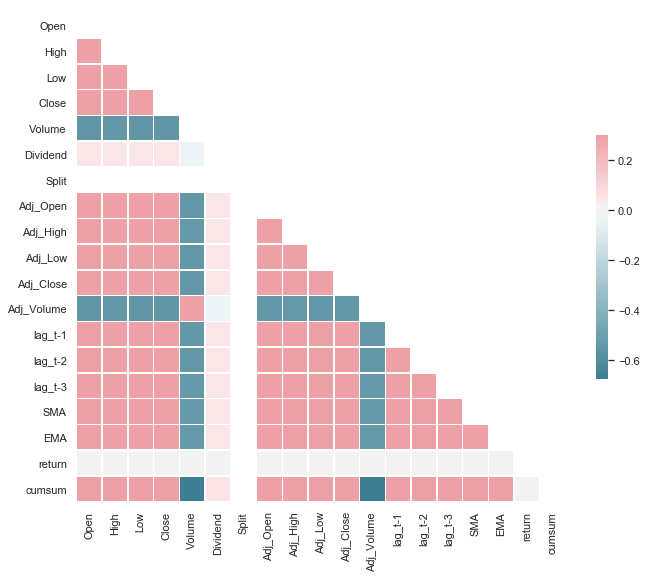

In [41]:
import seaborn as sns
sns.set(style="white")

# Compute the correlation matrix
corr = jpm.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})